In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
lassocv = LassoCV()
elasticnet = ElasticNet()
elasticnetcv = ElasticNetCV()
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.feature_selection as fs
pd.set_option('display.max_columns', None)
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')
standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
baseline_df.sample(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SalePrice,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Pave,Alley__No Alley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__No Masonry Veneer,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__No Basement,BsmtFinType1__Rec,BsmtFinType1__Unf,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__Y,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence,MiscFeature__Shed,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,WoodDeckSF__1,OpenPorchSF__1,EnclosedPorch__1,3SsnPorch__1,ScreenPorch__1,PoolArea__1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
cont_var_for_tuning=ordinal_var_processed+cont_var_processed

x=baseline_df.drop('SalePrice',axis='columns')
y=baseline_df.SalePrice
standardized_x=standardized_baseline_df.drop('SalePrice',axis='columns')
standardized_y=standardized_baseline_df.SalePrice
normalized_x=normalized_baseline_df.drop('SalePrice',axis='columns')
normalized_y=normalized_baseline_df.SalePrice

In [3]:
# Train Test Split (ALL FEATURES)
# standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x, standardized_y, test_size=0.3, random_state=0)
# normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=0.3, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x[cont_var_for_tuning], standardized_y, test_size=0.3, random_state=0)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x[cont_var_for_tuning], normalized_y, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

In [4]:
#################################################################################
#################################################################################
####### Deciding whether to use scaled features or not HERE!!!!! ################
#################################################################################
#################################################################################

x_train, x_test, y_train, y_test = standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test

#################################################################################
#################################################################################

In [5]:
# checking the optimal number of k folds
mean_error = []
std_error = []
kfold = range(3, 20)
for i in kfold:
    scores = ms.cross_val_score(estimator=lasso, X=x, y=y, cv=i)
    mean_error.append(1 - scores.mean())   
    std_error.append(scores.std())
np.argmin(mean_error)
# this suggests that the smallest k fold is best... will use 5 fold from now on

0

Text(0, 0.5, 'R2 Score')

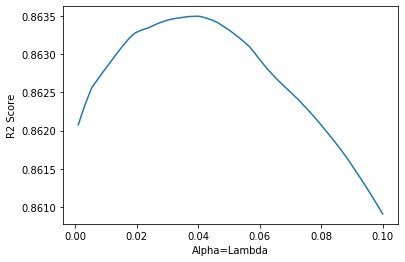

In [6]:
# Lasso Grid Search
ms_kfold = ms.KFold(n_splits=5)
grid_param=[{'alpha':np.linspace(0.001,0.01,1001)}]
para_search = GridSearchCV(estimator=lasso,\
                           param_grid=grid_param, scoring='r2', cv=5,return_train_score=True)
para_search = para_search.fit(x_train, y_train)
plt.plot(np.linspace(0.001,0.1,1001),para_search.cv_results_['mean_test_score'])
plt.xlabel('Alpha=Lambda')
plt.ylabel('R2 Score')

In [7]:
lasso_best_score = para_search.best_score_
lasso_best_alpha = para_search.best_params_
lasso_best_coef = para_search.best_estimator_.coef_
lasso_best_intercept = para_search.best_estimator_.intercept_
lasso_best_features=list(x_train.columns[lasso_best_coef!=0])
lasso_best_features

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'GarageCars',
 'YrSold',
 'HeatingQC',
 'KitchenQual',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea']